In [1]:
pwd

'/Users/suman/Untitled Folder'

In [2]:
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
import sklearn
import sklearn.datasets
import sklearn.linear_model
from sklearn import preprocessing
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
label_e=preprocessing.LabelEncoder()
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.metrics import roc_auc_score
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from sklearn.decomposition import PCA
import csv
import string
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

In [3]:
df = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
df = df.dropna()
df = df.iloc[:100000]
test_data = test_data.iloc[:10000]
test_data = test_data.dropna()

In [4]:
df.head()

,PRODUCT_ID,TITLE,BULLET_POINTS,DESCRIPTION,PRODUCT_TYPE_ID,PRODUCT_LENGTH
2,2765088,PRIKNIK Horn Red Electric Air Horn Compressor ...,"[Loud Dual Tone Trumpet Horn, Compatible With ...","Specifications: Color: Red, Material: Aluminiu...",7537,748.031495
3,1594019,ALISHAH Women's Cotton Ankle Length Leggings C...,[Made By 95%cotton and 5% Lycra which gives yo...,AISHAH Women's Lycra Cotton Ankel Leggings. Br...,2996,787.401574
5,2152929,HINS Metal Bucket Shape Plant Pot for Indoor &...,"[Simple and elegant, great for displaying indo...",HINS Brings you the most Elegant Looking Pot w...,5725,950.000000
7,2026580,Delavala Self Adhesive Kitchen Backsplash Wall...,[HIGH QUALITY PVC MATERIAL: The kitchen alumin...,<p><strong>Aluminum Foil Stickers-good kitchen...,6030,984.251967
9,2998633,Hexwell Essential oil for Home Fragrance Oil A...,[100% Pure And Natural Essential Oil Or Fragra...,"Transform your home, workplace or hotel room i...",8201,393.700787


KeyError: 'PROUDUCT_ID'

In [5]:
df["PRODUCT_ID"].value_counts()

2765088    1
1995254    1
2912141    1
1094448    1
2568373    1
          ..
2677271    1
2233481    1
2462268    1
1011843    1
2803116    1
Name: PRODUCT_ID, Length: 100000, dtype: int64

In [6]:
df["TITLE"].value_counts()

Outdoor Patio Furniture Covers Waterproof Rectangular Patio Table Cover, Oxford Polyester Material Windproof, Anti-UV,Durable Waterproof Dustproof Outdoor Cover for Garden    7
Zeya Yellow Gold Ring                                                                                                                                                          5
Irnado Women Leather Comfortable Footwear For All Occasions                                                                                                                    4
Antigua Men's NFL 75th Anniversary Victory Full-Zip Hoodie                                                                                                                     4
Design Cart Designer Printed Hard Case Back Cover for Vivo Y81i / Vivo 1812                                                                                                    4
                                                                                                                   

In [7]:
df["BULLET_POINTS"].value_counts()

[Good quality and Suitable to use.,This Product comes in a proper Packaging.,In case of any query or issue. Feel free to reach out to us.,Contains: Pack of 1.,Delivery within 3-5 weeks.]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [8]:
df["DESCRIPTION"].value_counts()

This Case is Made up of Hard Polycarbonate Plastic and printed on all 3 sides of back cover. This cover protects your mobile from scratches and bumps. This printed case gives premier look to your mobile.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

In [9]:
df["PRODUCT_TYPE_ID"].value_counts()

12064    5274
0        1800
2879     1441
2211     1361
2986     1306
         ... 
2536        1
3559        1
1128        1
3899        1
720         1
Name: PRODUCT_TYPE_ID, Length: 6135, dtype: int64

In [10]:
df["PRODUCT_LENGTH"].value_counts()

5.905512e+02    6265
3.937008e+02    5079
7.874016e+02    3312
7.086614e+02    2366
1.200000e+03    2207
                ... 
2.770000e+02       1
1.800000e+06       1
3.409449e+03       1
3.137000e+03       1
9.059055e+02       1
Name: PRODUCT_LENGTH, Length: 3878, dtype: int64

In [11]:
df.shape

(100000, 6)

In [12]:
df.columns

Index(['PRODUCT_ID', 'TITLE', 'BULLET_POINTS', 'DESCRIPTION',
       'PRODUCT_TYPE_ID', 'PRODUCT_LENGTH'],
      dtype='object')

In [13]:
test_data.columns

Index(['PRODUCT_ID', 'TITLE', 'BULLET_POINTS', 'DESCRIPTION',
       'PRODUCT_TYPE_ID'],
      dtype='object')

In [14]:
def prep_train_data(td):
    new_td = td.drop_duplicates()
    new_td = new_td.dropna()
    new_td['PRODUCT_ID'] = new_td.index+1
    new_td.set_index('PRODUCT_ID',inplace=True)
    new_td['data']= new_td['TITLE'].astype(str)+" "+new_td['BULLET_POINTS'].astype(str)+" "+new_td['DESCRIPTION'].astype(str)+" "+new_td['PRODUCT_TYPE_ID'].astype(str)
    return new_td

In [15]:
def prep_test_data(td):
    new_td = td.drop_duplicates()
    new_td = new_td.dropna()
    new_td.set_index('PRODUCT_ID',inplace=True)
    new_td['data']= new_td['TITLE'].astype(str)+" "+new_td['BULLET_POINTS'].astype(str)+" "+new_td['DESCRIPTION'].astype(str)+" "+new_td['PRODUCT_TYPE_ID'].astype(str)
    return new_td


In [16]:
new_df = prep_train_data(df)
test_df = prep_test_data(test_data)
new_df.head()

,TITLE,BULLET_POINTS,DESCRIPTION,PRODUCT_TYPE_ID,PRODUCT_LENGTH,data
PRODUCT_ID,,,,,,
3,PRIKNIK Horn Red Electric Air Horn Compressor ...,"[Loud Dual Tone Trumpet Horn, Compatible With ...","Specifications: Color: Red, Material: Aluminiu...",7537,748.031495,PRIKNIK Horn Red Electric Air Horn Compressor ...
4,ALISHAH Women's Cotton Ankle Length Leggings C...,[Made By 95%cotton and 5% Lycra which gives yo...,AISHAH Women's Lycra Cotton Ankel Leggings. Br...,2996,787.401574,ALISHAH Women's Cotton Ankle Length Leggings C...
6,HINS Metal Bucket Shape Plant Pot for Indoor &...,"[Simple and elegant, great for displaying indo...",HINS Brings you the most Elegant Looking Pot w...,5725,950.000000,HINS Metal Bucket Shape Plant Pot for Indoor &...
8,Delavala Self Adhesive Kitchen Backsplash Wall...,[HIGH QUALITY PVC MATERIAL: The kitchen alumin...,<p><strong>Aluminum Foil Stickers-good kitchen...,6030,984.251967,Delavala Self Adhesive Kitchen Backsplash Wall...
10,Hexwell Essential oil for Home Fragrance Oil A...,[100% Pure And Natural Essential Oil Or Fragra...,"Transform your home, workplace or hotel room i...",8201,393.700787,Hexwell Essential oil for Home Fragrance Oil A...


In [17]:
new_df.shape

(100000, 6)

<AxesSubplot:ylabel='PRODUCT_ID'>

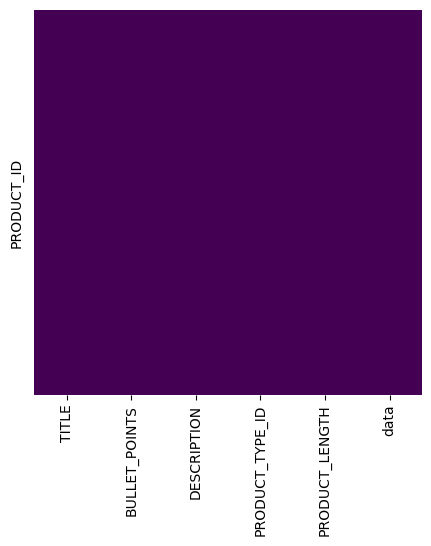

In [18]:
plt.figure(figsize=(5,5))
sns.heatmap(new_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:ylabel='PRODUCT_ID'>

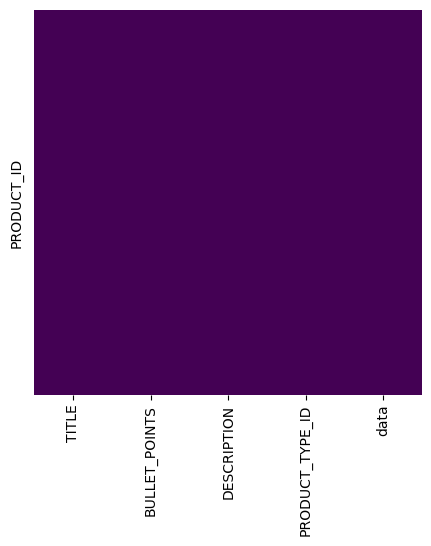

In [19]:
plt.figure(figsize=(5,5))
sns.heatmap(test_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [20]:
y=new_df['PRODUCT_TYPE_ID']
new_df.drop(['PRODUCT_TYPE_ID'],axis=1,inplace=True)
print(new_df.shape)
print(y.shape)

(100000, 5)
(100000,)


In [23]:
import string
import nltk

try:
    from nltk.corpus import stopwords
except LookupError:
    nltk.downloader.Downloader().download('stopwords', timeout=10)
    from nltk.corpus import stopwords

stop_words = stopwords.words("english")
punc = string.punctuation
spec_chars = ["!",'"',"#","%","&","'","(",")",
              "*","+",",","-",".","/",":",";","<",
              "=",">","?","@","[","\\","]","^","_",
              "`","{","|","}","~","–","0","1","2","3","4","5","6","7","8","9"]
print(stop_words)
print(punc)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [30]:
import re
def data_clean(a):
    b = a.lower()
    for char in string.punctuation:
        b = b.replace(char,' ')
    stop_words = stopwords.words("english")
    c = b.split()
    c = [word for word in c if word not in stop_words]
    c = pd.Series(c)
    return c.iloc[0]

In [31]:
print(new_df['data'].head())
new_df['data'] = new_df['data'].apply(lambda x:data_clean(x))

PRODUCT_ID
3     PRIKNIK Horn Red Electric Air Horn Compressor ...
4     ALISHAH Women's Cotton Ankle Length Leggings C...
6     HINS Metal Bucket Shape Plant Pot for Indoor &...
8     Delavala Self Adhesive Kitchen Backsplash Wall...
10    Hexwell Essential oil for Home Fragrance Oil A...
Name: data, dtype: object


In [32]:
print(new_df.head())

                                                        TITLE  \
PRODUCT_ID                                                      
3           PRIKNIK Horn Red Electric Air Horn Compressor ...   
4           ALISHAH Women's Cotton Ankle Length Leggings C...   
6           HINS Metal Bucket Shape Plant Pot for Indoor &...   
8           Delavala Self Adhesive Kitchen Backsplash Wall...   
10          Hexwell Essential oil for Home Fragrance Oil A...   

                                                BULLET_POINTS  \
PRODUCT_ID                                                      
3           [Loud Dual Tone Trumpet Horn, Compatible With ...   
4           [Made By 95%cotton and 5% Lycra which gives yo...   
6           [Simple and elegant, great for displaying indo...   
8           [HIGH QUALITY PVC MATERIAL: The kitchen alumin...   
10          [100% Pure And Natural Essential Oil Or Fragra...   

                                                  DESCRIPTION  PRODUCT_LENGTH  \
PRODUCT

In [33]:
print(test_df.head())
test_df['data'] = test_df['data'].apply(lambda x:data_clean(x))


                                                        TITLE  \
PRODUCT_ID                                                      
1729783     DCGARING Microfiber Throw Blanket Warm Fuzzy P...   
1871949     I-Match Auto Parts Front License Plate Bracket...   
1107571     PinMart Gold Plated Excellence in Service 1 Ye...   
2782548     Evershine Shoppee 10m Waxed Nylon Thread Cotto...   
2736605     SHASAK Sanganer Hand Block Printed Short Kurta...   

                                                BULLET_POINTS  \
PRODUCT_ID                                                      
1729783     [QUALITY GUARANTEED: Luxury cozy plush polyest...   
1871949     [Front License Plate Bracket Made Of Plastic,D...   
1107571     [Available as a single item or bulk packed. Se...   
2782548     [Kindly Refer The Product Description Before B...   
2736605     [Confused between wearing a T-shirt and a shir...   

                                                  DESCRIPTION  \
PRODUCT_ID             

In [34]:
test_df.head()

,TITLE,BULLET_POINTS,DESCRIPTION,PRODUCT_TYPE_ID,data
PRODUCT_ID,,,,,
1729783,DCGARING Microfiber Throw Blanket Warm Fuzzy P...,[QUALITY GUARANTEED: Luxury cozy plush polyest...,<b>DCGARING Throw Blanket</b><br><br> <b>Size ...,1622,dcgaring
1871949,I-Match Auto Parts Front License Plate Bracket...,"[Front License Plate Bracket Made Of Plastic,D...",Replacement for The Following Vehicles:2020 LE...,7540,match
1107571,PinMart Gold Plated Excellence in Service 1 Ye...,[Available as a single item or bulk packed. Se...,Our Excellence in Service Lapel Pins feature a...,12442,pinmart
2782548,Evershine Shoppee 10m Waxed Nylon Thread Cotto...,[Kindly Refer The Product Description Before B...,Description: Material: Nylon Length: about 10m...,11205,evershine
2736605,SHASAK Sanganer Hand Block Printed Short Kurta...,[Confused between wearing a T-shirt and a shir...,Men’s Pure Cotton Sanganeri Hand-Block Print S...,2911,shasak


In [35]:
x_train,x_test,y_train,y_test=train_test_split(new_df,y,random_state=0)


In [37]:
countvt = CountVectorizer().fit(x_train['data'])
x_train_bow = countvt.transform(x_train['data'])
print("Train Done")
x_test_bow = countvt.transform(x_test['data'])
print("Test Done")

Train Done
Test Done


In [38]:
print(x_train.shape)
print(x_train_bow.shape)

(75000, 5)
(75000, 26317)


In [39]:
tfidf = TfidfTransformer().fit(x_train_bow)
x_train_tfidf = tfidf.transform(x_train_bow)
x_test_tfidf = tfidf.transform(x_test_bow)
print("tf - idf shape : ",x_train_tfidf.shape)

tf - idf shape :  (75000, 26317)


NameError: name 'train' is not defined